In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [6]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [7]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [8]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating Joint Probability
### The Dot Product

In [9]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [10]:
a.dot(b)

22

In [12]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [13]:
print(a.dot(c))
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [15]:
[1*0 + 2*3 + 3*5 , 1*6 + 2*0 + 3*1]

[21, 9]

Dimensions of the dor product between X_test and prob_token_spam

In [16]:
X_test.shape

(1723, 2500)

In [17]:
prob_token_spam.shape

(2500,)

In [18]:
print('shape of the dot product is', X_test.dot(prob_token_spam).shape)

shape of the dot product is (1723,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {p(X)}$$

In [19]:
PROB_SPAM = 0.3116

Calculating log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam.

In [21]:
np.log(prob_token_spam)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

## Joint Probability in log format

In [24]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [25]:
joint_log_spam[:5]

array([  3.21643926,  13.38035269,  19.20668974, -16.61242345,
        27.93765399])

Calculating log probability that the emails are non-spam given their tokens. showing results in joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))} {p(X)}$$

In [26]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [27]:
joint_log_ham[:5]

array([-11.05063426, -36.94310619, -38.25679825,  -2.70364873,
       -60.15266519])

In [29]:
joint_log_ham.size

1723

# Making Predictions
### Checking for the higher joint probability

$$P(Spam \, | \, S) \, > \, P(Ham \, | \, X)$$
<center>OR</center>
<br>
$$P(Spam \, | \, S) \, < \, P(Ham \, | \, X)$$

Creating vector of predictions, our $\hat y$ . Spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Storing results in `prediction`

In [30]:
prediction  = joint_log_spam > joint_log_ham

In [33]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [32]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) \neq \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)} $$

In [34]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evalluation
## Accuracy

In [37]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly', correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1671
Docs classified incorrectly 52


In [38]:
# Accuracy
correct_doc/len(X_test)

0.9698200812536274

In [41]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {: .2%}'.format(fraction_wrong))
print('Accuracy of the model is {: .2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is  3.02%
Accuracy of the model is  96.98%


# Visualising the Results

In [45]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'p(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

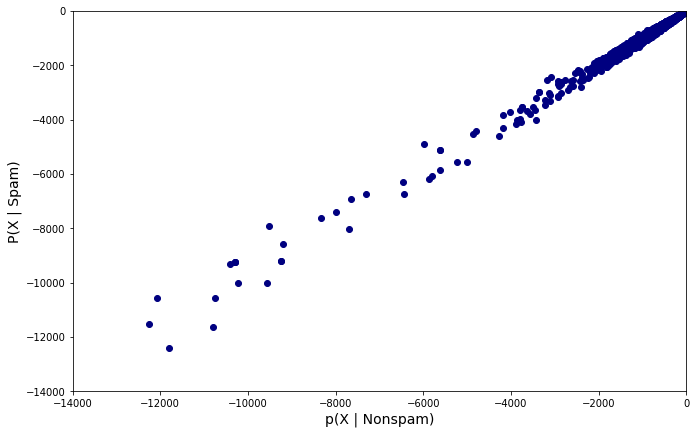

In [44]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

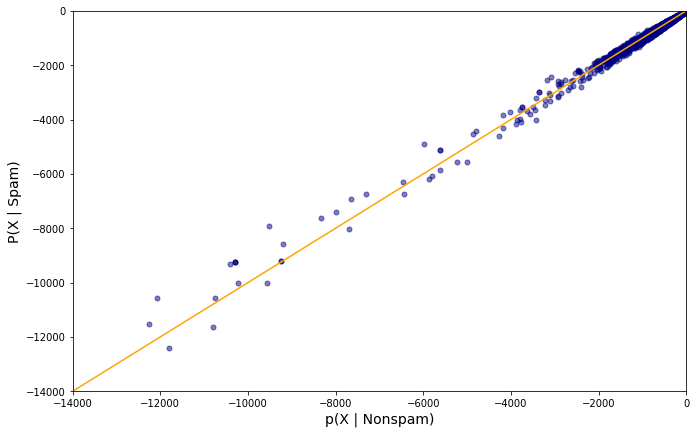

In [49]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

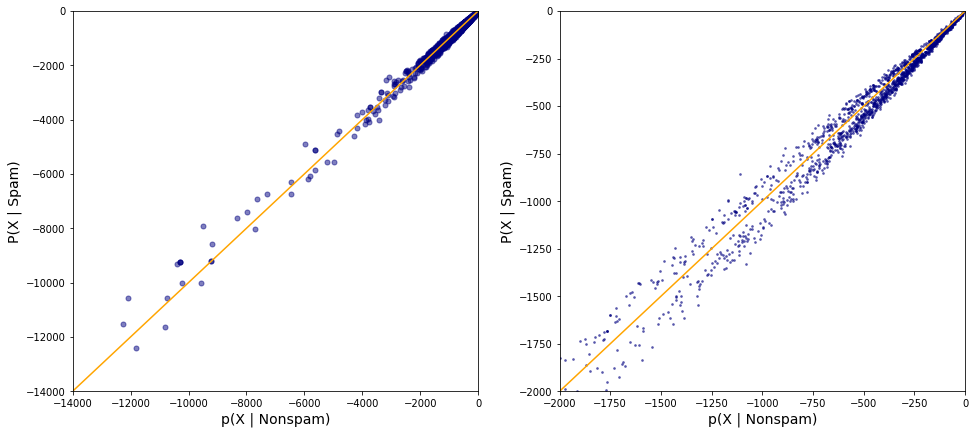

In [50]:
plt.figure(figsize=(16, 7))

# Chart Nr. 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr. 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [51]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})

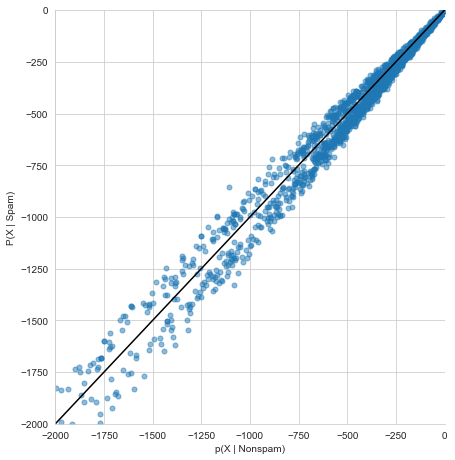

In [60]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

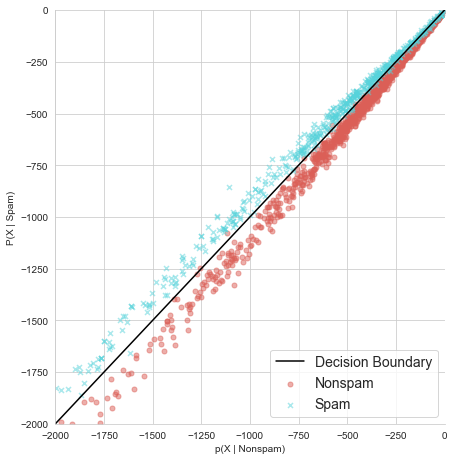

In [71]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o','x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

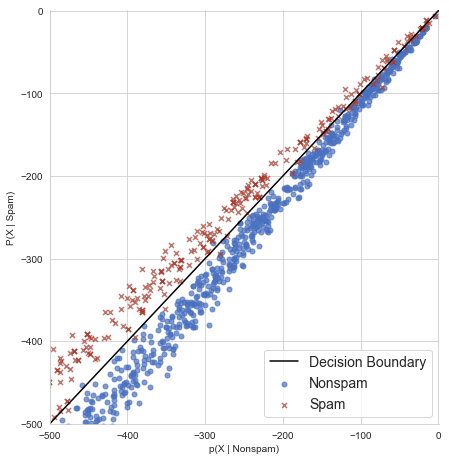

In [75]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o','x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

# False Positives and False Negetives

In [76]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1163,  560], dtype=int64))

In [79]:
true_pos = (y_test == 1) & (prediction == 1) # bitwise and '&'

In [82]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [83]:
true_pos.sum()

548

Creating a numpy array that measures the False Positive for each datapoint. Call this variable `false_pos`.Then work out how many false positives there were. After you've done that, do the same for the false negetives. Store those in a variable called `false_neg`

In [84]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

12

In [86]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

40

## Recall Score
storing in `recall_score` and printing the value of the recall score as a percentage rounded to two decimal places.

In [87]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 93.20%


## Precision Score
Calculate the precision of our naive bayes model. Store the result in a variable `precision_scores`. Print out the precsion as a decimal rounded to three decimal places

In [88]:
precision_scores = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_scores))

Precision score is 0.979


## F-Score or F1 Score

In [92]:
f1_score = 2 * (precision_scores * recall_score) / (precision_scores + recall_score)
print('F score is {:.2}'.format(f1_score))

F score is 0.95
